# **Implementação Trabalho Prático IA**


*   Odalisio Leite da Silva Neto
*   Vinícius Patrício Medeiros 
*   Luiza Paula M. Leão
*   Rodrigo G. Printes
*   Victor G. Cavalcante 
*   Daniel Santiago da Silva 
*   André Luiz Miranda Brandão 
*   Victor G. Cavalcante




# Instalações Necessárias

In [ ]:
!pip install keras-rectified-adam
!pip install gdown

  Preparing metadata (setup.py) ... - done
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.20.0-py3-none-any.whl size=8256 sha256=cf0be304e0ee409398a651c839aca16db7590a058dc2f4bb0a5a6fb47e877203
  Stored in directory: /home/impactlab1/.cache/pip/wheels/24/94/84/addb144608f138b885a2a9f6830b110293290cc5c1befc0d3e
Successfully built keras-rectified-adam


# Bibliotecas

In [ ]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.losses import binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import applications
from keras_radam import RAdam
from sklearn.model_selection import LeaveOneOut, KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
       

2023-02-28 20:22:14.810029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 20:22:14.877499: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
seed_value=13

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
     

# Conjunto de Dados

Baixando dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1Y133LvvxdrB9bnBUsPgZanqEVp0C38LJ

Downloading...
From: https://drive.google.com/uc?id=1Y133LvvxdrB9bnBUsPgZanqEVp0C38LJ
To: /home/impactlab1/trains-transformed.csv
100%|██████████████████████████████████████| 1.93k/1.93k [00:00<00:00, 2.75MB/s]


In [ ]:
data = pd.read_csv("trains-transformed.csv")
data

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,5,4,2,long,openrect,3,rectanglod,2,short,slopetop,...,1,0,0,0,1,0,0,1,0,east
1,4,3,2,short,ushaped,1,trianglod,2,short,opentrap,...,1,0,1,0,0,0,0,0,0,east
2,4,2,2,short,openrect,1,circlelod,2,short,hexagon,...,0,0,0,1,0,1,0,0,0,east
3,5,2,2,short,opentrap,1,trianglod,2,short,dblopnrect,...,1,0,0,1,0,0,0,0,0,east
4,4,3,2,short,dblopnrect,1,trianglod,3,long,closedrect,...,1,0,1,0,0,0,0,0,0,east
5,3,2,2,long,closedrect,3,circlelod,2,short,openrect,...,0,0,0,0,0,1,0,0,0,west
6,4,2,2,short,dblopnrect,1,circlelod,2,short,ushaped,...,0,0,0,0,0,1,0,0,0,west
7,3,2,3,long,closedrect,1,rectanglod,2,short,ushaped,...,0,0,1,0,0,0,0,0,0,west
8,5,2,2,short,opentrap,1,circlelod,2,long,jaggedtop,...,0,0,1,0,0,0,0,0,0,west
9,3,1,2,short,ushaped,1,rectanglod,2,long,openrect,...,0,0,0,0,0,0,0,0,0,west


In [ ]:
data.columns

Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels1', 'length1',
       'shape1', 'num_loads1', 'load_shape1', 'num_wheels2', 'length2',
       'shape2', 'num_loads2', 'load_shape2', 'num_wheels3', 'length3',
       'shape3', 'num_loads3', 'load_shape3', 'num_wheels4', 'length4',
       'shape4', 'num_loads4', 'load_shape4', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_to_hexagon',
       'Rectangle_next_to_circle', 'Triangle_next_to_triangle',
       'Triangle_next_to_hexagon', 'Triangle_next_to_circle',
       'Hexagon_next_to_hexagon', 'Hexagon_next_to_circle',
       'Circle_next_to_circle', 'Class_attribute'],
      dtype='object')

In [ ]:
data.shape

(10, 33)

# **Questão 1**

## Implementação Meta-rede

In [ ]:
# modelo de classificação de trens
# construção de cada meta-rede

def metarede():

  t   = Input(shape=(1,), name='t')
  c   = Input(shape=(1,), name='c') 
  w   = Input(shape=(1,), name='w')
  l   = Input(shape=(1,), name='l')
  s   = Input(shape=(1,), name='s')
  nc  = Input(shape=(1,), name='nc')
  ls  = Input(shape=(1,), name='ls')
  nl  = Input(shape=(1,), name='nl')
  ncl = Input(shape=(1,), name='ncl')
  x_crc = Input(shape=(1,), name='x_crc')
  x_hex = Input(shape=(1,), name='x_hex')
  x_rec = Input(shape=(1,), name='x_rec')
  x_tri = Input(shape=(1,), name='x_tri')

  # 1. num_cars(t, nc), em que t ∊ [1..10] e nc ∊ [3..5].
  num_cars_ = concatenate([t,nc])
  num_cars_ = Dense(20, activation='relu')(num_cars_)
  num_cars = Dense(1, activation='sigmoid', name='num_cars')(num_cars_)
  num_cars = Model(inputs=[t,nc], outputs=num_cars)

  #2. num\_loads(t, nl) em que t ∊ [1..10] e nl ∊ [1..4].
  num_loads_ = concatenate([t,nl])
  num_loads_ = Dense(20, activation='relu')(num_loads_)
  num_loads = Dense(1, activation='sigmoid', name='num_loads')(num_loads_)
  num_loads = Model(inputs=[t,nl], outputs=num_loads)

  #3. num_wheels(t, c, w) em que t ∊ [1..10] e c ∊ [1..4] e w ∊ [2..3].
  num_wheels_ = concatenate([t,c,w])
  num_wheels_ = Dense(20, activation='relu')(num_wheels_)
  num_wheels = Dense(1, activation='sigmoid', name='num_wheels')(num_wheels_)
  num_wheels = Model(inputs=[t,c,w], outputs=num_wheels)

  #4. length(t, c, l) em que t ∊ [1..10] e c ∊ [1..4] e l ∊ [-1..1](-1 denota curto e 1 longo)
  length_ = concatenate([t,c,l])
  length_ = Dense(20, activation='relu')(length_)
  length = Dense(1, activation='sigmoid', name='length')(length_)
  length = Model(inputs=[t,c,l], outputs=length)

  #5.shape(t, c, s) em que t ∊ [1..10] e c ∊ [1..4] e s ∊ [1..10](um número para cada forma).
  shape_ = concatenate([t,c,s])
  shape_ = Dense(20, activation='relu')(shape_)
  shape = Dense(1, activation='sigmoid', name='shape')(shape_)
  shape = Model(inputs=[t,c,s], outputs=shape)

  #6. num_cars_loads(t, c, ncl) em que t ∊ [1..10] e c ∊ [1..4] e ncl ∊ [0..3].
  num_car_loads_ = concatenate([t,c,ncl])
  num_car_loads_ = Dense(20, activation='relu')(num_car_loads_)
  num_car_loads = Dense(1, activation='sigmoid', name='num_car_loads')(num_car_loads_)
  num_car_loads = Model(inputs=[t,c,ncl], outputs=num_car_loads)

  #7. load_shape(t, c, ls) em que t ∊ [1..10] e c ∊ [1..4] e ls ∊ [1..4].
  load_shape_ = concatenate([t,c,ls])
  load_shape_ = Dense(20, activation='relu')(load_shape_)
  load_shape = Dense(1, activation='sigmoid', name='load_shape')(load_shape_)
  load_shape = Model(inputs=[t,c,ls], outputs=load_shape)

  #8. next_crc(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em círculo.
  next_crc_ = concatenate([t,c,x_crc])
  next_crc_ = Dense(20, activation='relu')(next_crc_)
  next_crc = Dense(1, activation='sigmoid', name='next_crc')(next_crc_)
  next_crc = Model(inputs=[t,c,x_crc], outputs=next_crc)

  #9. next_hex(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em hexágono.
  next_hex_ = concatenate([t,c,x_hex])
  next_hex_ = Dense(20, activation='relu')(next_hex_)
  next_hex = Dense(1, activation='sigmoid', name='next_hex')(next_hex_)
  next_hex = Model(inputs=[t,c,x_hex], outputs=next_hex)

  #10. next_rec(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em retângulo.
  next_rec_ = concatenate([t,c,x_rec])
  next_rec_ = Dense(20, activation='relu')(next_rec_)
  next_rec = Dense(1, activation='sigmoid', name='next_rec')(next_rec_)
  next_rec = Model(inputs=[t,c,x_rec], outputs=next_rec)

  #11.next_tri(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em triângulo
  next_tri_ = concatenate([t,c,x_tri])
  next_tri_ = Dense(20, activation='relu')(next_tri_)
  next_tri = Dense(1, activation='sigmoid', name='next_tri')(next_tri_)
  next_tri = Model(inputs=[t,c,x_tri], outputs=next_tri)

  east = concatenate([ num_cars_, num_loads_, num_wheels_,length_,shape_, num_car_loads_,
                    load_shape_, next_crc_, next_hex_, next_rec_,next_tri_])
  east = Dense(3, activation='relu')(east)
  east = Dense(1, activation='sigmoid', name='east')(east)
  east = Model(inputs=[t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri], outputs=east)
# metanet
  metanet = Model(inputs=east.inputs, 
              outputs=[num_cars.output, num_loads.output, num_wheels.output, length.output,
                      shape.output, num_car_loads.output, load_shape.output,next_crc.output,
                      next_hex.output, next_rec.output, next_tri.output, east.output])
  
  rules = { 'num_cars': num_cars, 'num_loads': num_loads, 'num_wheels': num_wheels, 
        'length': length, 'shape': shape, 'num_car_loads': num_car_loads,
        'load_shape': load_shape, 'next_crc': next_crc, 'next_hex': next_hex,
        'next_rec': next_rec, 'next_tri': next_tri,}
  return metanet, east, rules


In [ ]:
metanet, east, rules =  metarede()

In [ ]:
metanet.summary()

Model: "model_329"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 t (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 nc (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 nl (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 c (InputLayer)                 [(None, 1)]          0           []                               
                                                                                          

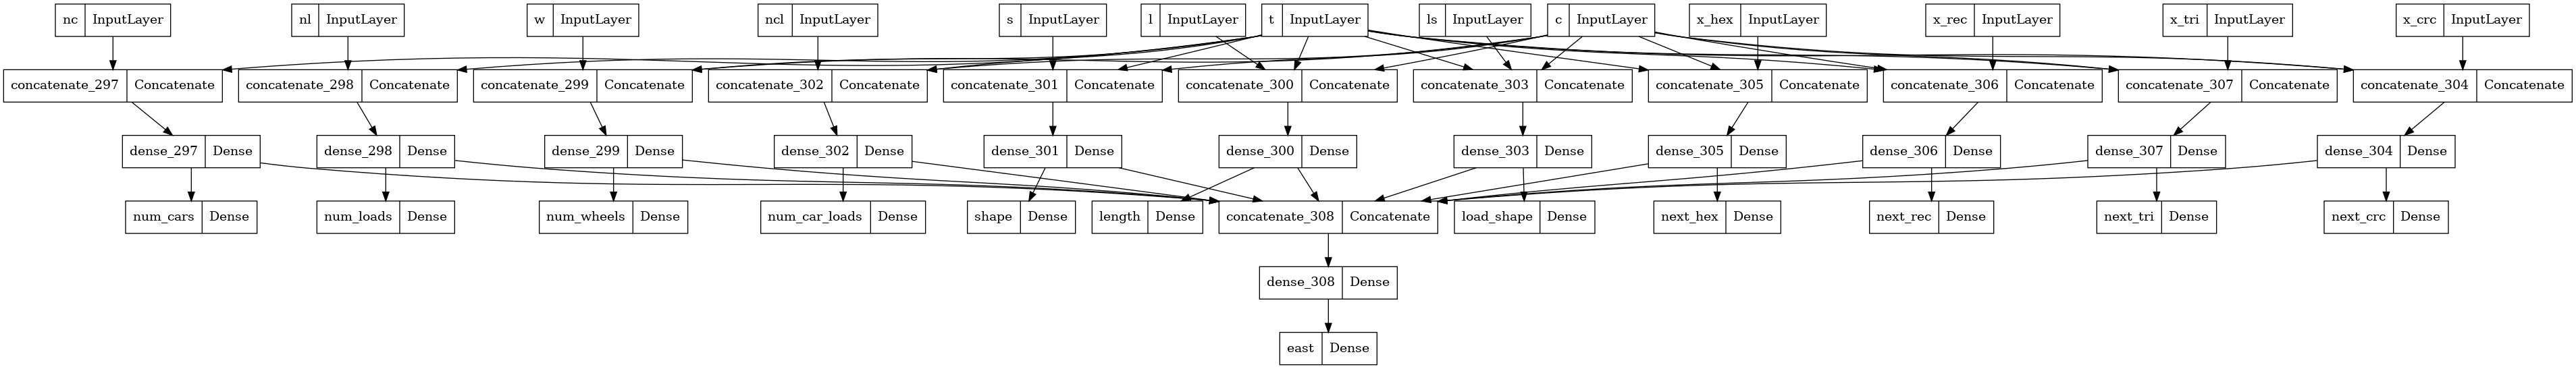

In [ ]:
plot_model(metanet, show_shapes=False, show_layer_names=True)

## Preparo do dataset

In [ ]:
def encode_to_int(field,top):
  data[field].replace(top,[float(i) for i in range(len(top)-1)] + [-1] ,inplace=True)

In [ ]:
length = ['short', 'long','None']
shape = ['closedrect', 'dblopnrect', 'ellipse', 'engine', 'hexagon','jaggedtop', 'openrect', 'opentrap', 'slopetop', 'ushaped','None']
load_shape = ['circlelod', 'hexagonlod', 'rectanglod', 'trianglod','None']
Class_attribute = ['west','east']

for f in ['length1','length2','length3','length4']:
  encode_to_int(f,length)

for f in ['shape1','shape2','shape3','shape4']:
  encode_to_int(f,shape)

for f in ['load_shape1','load_shape2','load_shape3','load_shape4']:
  encode_to_int(f,load_shape)

for f in ['num_loads1','num_loads2','num_loads3','num_loads4']:
  encode_to_int(f,['None'])

for f in ['num_wheels1','num_wheels2','num_wheels3','num_wheels4']:
  encode_to_int(f,['None'])


data['Class_attribute'].replace(Class_attribute,[0,1],inplace=True)

In [ ]:
data = data.astype(float)
print(data.dtypes)

Number_of_cars                 float64
Number_of_different_loads      float64
num_wheels1                    float64
length1                        float64
shape1                         float64
num_loads1                     float64
load_shape1                    float64
num_wheels2                    float64
length2                        float64
shape2                         float64
num_loads2                     float64
load_shape2                    float64
num_wheels3                    float64
length3                        float64
shape3                         float64
num_loads3                     float64
load_shape3                    float64
num_wheels4                    float64
length4                        float64
shape4                         float64
num_loads4                     float64
load_shape4                    float64
Rectangle_next_to_rectangle    float64
Rectangle_next_to_triangle     float64
Rectangle_next_to_hexagon      float64
Rectangle_next_to_circle 

In [ ]:
df = data
cols = [[c for c in df.columns if not(str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1])==n)] for n in range(1,5)]

In [ ]:
dt = [df[col] for col in cols]

In [ ]:
for c, df in enumerate(dt):
  df.columns = [name if not str.isdigit(name[-1]) else name[:-1] for name in df.columns]
  df['car'] = c+1

dt = pd.concat(dt)
dt.reset_index(level=0, inplace=True)
dt['train'] = dt.pop('index')
dt.T[0]

Number_of_cars                 5.0
Number_of_different_loads      4.0
num_wheels                     2.0
length                         1.0
shape                          6.0
num_loads                      3.0
load_shape                     2.0
Rectangle_next_to_rectangle    0.0
Rectangle_next_to_triangle     1.0
Rectangle_next_to_hexagon      0.0
Rectangle_next_to_circle       0.0
Triangle_next_to_triangle      0.0
Triangle_next_to_hexagon       1.0
Triangle_next_to_circle        0.0
Hexagon_next_to_hexagon        0.0
Hexagon_next_to_circle         1.0
Circle_next_to_circle          0.0
Class_attribute                1.0
car                            1.0
train                          0.0
Name: 0, dtype: float64

In [ ]:
def get_att1(X):
    t = X['train'].T
    c = X['car'].T
    w = X['num_wheels'].T
    l = X['length'].T
    s = X['shape'].T
    nc = X['Number_of_cars'].T
    ls = X['load_shape'].T
    nl = X['Number_of_different_loads'].T
    ncl = X['num_loads'].T
    x_crc = np.sum(X[[col for col in X if col.endswith('circle')]], axis=1).T
    x_hex = np.sum(X[[col for col in X if col.endswith('hexagon')]], axis=1).T
    x_rec = np.sum(X[[col for col in X if col.endswith('rectangle')]], axis=1).T
    x_tri = np.sum(X[[col for col in X if col.endswith('triangle')]], axis=1).T
    return [t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]

In [ ]:
def split1(data, val_train):
    x_train = data.query(f'train != {val_train}')
    x_test = data.query(f'train == {val_train}')
    y_train = np.array(x_train.pop('Class_attribute'))
    y_test = np.array(x_test.pop('Class_attribute'))
    x_train = get_att1(x_train)
    x_test = get_att1(x_test)
    return x_train, x_test, np.array(y_train), np.array(y_test)

## Treino do Modelo

In [ ]:
kf = KFold(n_splits=10, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Cars Accuracy',
  'Output of flat network', 
  'Desired output', 
  'Class'
]
q2 = {name: [] for name in q2_names}

for val_train in tqdm(range(0,10)):
    x_train, x_test, y_train, y_test = split1(dt, val_train)
    metanet, east, rules = metarede()

    east.compile(
      loss = binary_crossentropy, 
      optimizer =tf.keras.optimizers.Adam(learning_rate=1e-2),
      metrics = ['mse', 'binary_accuracy'])
    hist = east.fit(
      x_train,
      y_train,
      validation_data=[x_test, y_test],
      epochs=1000,
      verbose=0,
      )
    hists[val_train] = hist

    q2['Train'].append(val_train)
    q2['Output of flat network'].append(east.predict(x_test)[0][0])
    q2['Desired output'].append(y_test[0])
    q2['Class'].append(Class_attribute[int(y_test[0])])

  0%|                                                                                            | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 170ms/step


 10%|████████▍                                                                           | 1/10 [00:45<06:50, 45.64s/it]

1/1 [==============================] - 0s 133ms/step


 20%|████████████████▊                                                                   | 2/10 [01:31<06:04, 45.58s/it]

1/1 [==============================] - 0s 135ms/step


 30%|█████████████████████████▏                                                          | 3/10 [02:16<05:17, 45.38s/it]

1/1 [==============================] - 0s 150ms/step


 40%|█████████████████████████████████▌                                                  | 4/10 [03:01<04:32, 45.43s/it]

1/1 [==============================] - 0s 138ms/step


 50%|██████████████████████████████████████████                                          | 5/10 [03:47<03:47, 45.47s/it]

1/1 [==============================] - 0s 139ms/step


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [04:33<03:02, 45.72s/it]

1/1 [==============================] - 0s 135ms/step


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [05:19<02:16, 45.65s/it]

1/1 [==============================] - 0s 138ms/step


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [06:04<01:31, 45.52s/it]

1/1 [==============================] - 0s 140ms/step


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [06:49<00:45, 45.41s/it]

1/1 [==============================] - 0s 136ms/step


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [07:35<00:00, 45.52s/it]


## Resultados

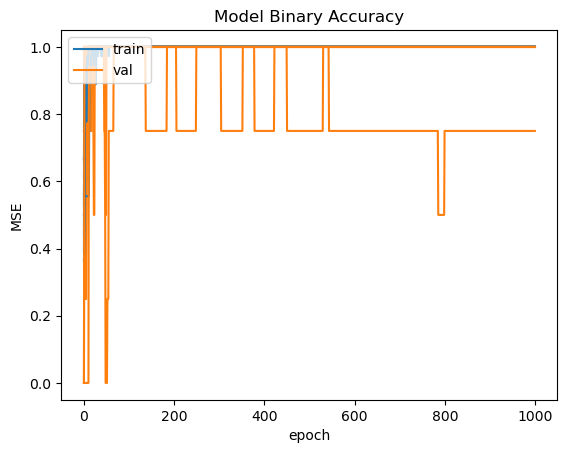

In [ ]:
for i,history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('Model Binary Accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
q2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,10)]

t2 = pd.DataFrame.from_dict(q2).round(2)
t2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,10)]
t2 = t2.reindex(columns=['Train', 'Cars Accuracy', 'Output of flat network', 'Desired output', 'Class'])
t2

,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,0,1.0,1.00,1.0,east
1,1,1.0,1.00,1.0,east
2,2,1.0,1.00,1.0,east
3,3,1.0,1.00,1.0,east
4,4,1.0,0.26,1.0,east
5,5,1.0,0.02,0.0,west
6,6,1.0,0.01,0.0,west
7,7,1.0,0.00,0.0,west
8,8,1.0,0.01,0.0,west
9,9,1.0,0.00,0.0,west


# **Questão 2**

## Conjunto de dados com novos trens e predicados

Download dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1x3P-Rz4-U-PpFcPVY_l1f6iB0iW4bVPS

Downloading...
From: https://drive.google.com/uc?id=1x3P-Rz4-U-PpFcPVY_l1f6iB0iW4bVPS
To: /home/impactlab1/trains-transformed-2.csv
100%|██████████████████████████████████████| 3.61k/3.61k [00:00<00:00, 5.68MB/s]


In [ ]:
data2 = pd.read_csv("trains-transformed-2.csv")

In [ ]:
data2.columns

Index(['Number_of_cars', 'Number_of_different_loads', 'num_jagged_top',
       'num_cars_dif', 'num_wheels1', 'length1', 'shape1', 'num_loads1',
       'load_shape1', 'roof_car1', 'num_wheels2', 'length2', 'shape2',
       'num_loads2', 'load_shape2', 'roof_car2', 'num_wheels3', 'length3',
       'shape3', 'num_loads3', 'load_shape3', 'roof_car3', 'num_wheels4',
       'length4', 'shape4', 'num_loads4', 'load_shape4', 'roof_car4',
       'Rectangle_next_to_rectangle', 'Rectangle_next_to_triangle',
       'Rectangle_next_to_hexagon', 'Rectangle_next_to_circle',
       'Triangle_next_to_triangle', 'Triangle_next_to_hexagon',
       'Triangle_next_to_circle', 'Hexagon_next_to_hexagon',
       'Hexagon_next_to_circle', 'Circle_next_to_circle', 'Class_attribute'],
      dtype='object')

Realizando processamento

In [ ]:
def encode_to_int(field,top):
  data2[field].replace(top,[float(i) for i in range(len(top)-1)] + [-1] ,inplace=True)

In [ ]:
length = ['short', 'long','None']
roof_car = ['open','close','None']
shape = ['closedrect', 'dblopnrect', 'ellipse', 'engine', 'hexagon','jaggedtop', 'openrect', 'opentrap', 'slopetop', 'ushaped','None']
load_shape = ['circlelod', 'hexagonlod', 'rectanglod', 'trianglod','None']
Class_attribute = ['west','east']

for f in ['length1','length2','length3','length4']:
  encode_to_int(f,length)

for f in ['shape1','shape2','shape3','shape4']:
  encode_to_int(f,shape)

for f in ['load_shape1','load_shape2','load_shape3','load_shape4']:
  encode_to_int(f,load_shape)

for f in ['num_loads1','num_loads2','num_loads3','num_loads4']:
  encode_to_int(f,['None'])

for f in ['num_wheels1','num_wheels2','num_wheels3','num_wheels4']:
  encode_to_int(f,['None'])

for f in ['roof_car1','roof_car2','roof_car3','roof_car4']:
  encode_to_int(f,roof_car)

data2['Class_attribute'].replace(Class_attribute,[0,1],inplace=True)

In [ ]:
data2 = data2.astype(float)
print(data2.dtypes)

Number_of_cars                 float64
Number_of_different_loads      float64
num_jagged_top                 float64
num_cars_dif                   float64
num_wheels1                    float64
length1                        float64
shape1                         float64
num_loads1                     float64
load_shape1                    float64
roof_car1                      float64
num_wheels2                    float64
length2                        float64
shape2                         float64
num_loads2                     float64
load_shape2                    float64
roof_car2                      float64
num_wheels3                    float64
length3                        float64
shape3                         float64
num_loads3                     float64
load_shape3                    float64
roof_car3                      float64
num_wheels4                    float64
length4                        float64
shape4                         float64
num_loads4               

Realizando a transformação do dataset para realizar o treino e validação do modelo de meta-redes

In [ ]:
df2 = data2
cols = [[c for c in df2.columns if not(str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1])==n)] for n in range(1,5)]

dt2 = [df2[col] for col in cols]
for c, df2 in enumerate(dt2):
    df2.columns = [name if not str.isdigit(name[-1]) else name[:-1] for name in df2.columns]
    df2['car'] = c+1

dt2 = pd.concat(dt2)
dt2.reset_index(level=0, inplace=True)
dt2['train'] = dt2.pop('index')
dt2.T[7]

Number_of_cars                 3.0
Number_of_different_loads      2.0
num_jagged_top                 0.0
num_cars_dif                   2.0
num_wheels                     3.0
length                         1.0
shape                          0.0
num_loads                      1.0
load_shape                     2.0
roof_car                       1.0
Rectangle_next_to_rectangle    0.0
Rectangle_next_to_triangle     0.0
Rectangle_next_to_hexagon      0.0
Rectangle_next_to_circle       1.0
Triangle_next_to_triangle      0.0
Triangle_next_to_hexagon       0.0
Triangle_next_to_circle        0.0
Hexagon_next_to_hexagon        0.0
Hexagon_next_to_circle         0.0
Circle_next_to_circle          0.0
Class_attribute                0.0
car                            1.0
train                          7.0
Name: 7, dtype: float64

In [ ]:
def get_att2(X):
    
    t = X['train'].T
    c = X['car'].T
    w = X['num_wheels'].T
    l = X['length'].T
    s = X['shape'].T
    nc = X['Number_of_cars'].T
    ls = X['load_shape'].T
    nl = X['Number_of_different_loads'].T
    ncl = X['num_loads'].T
    njt = X['num_jagged_top'].T
    ncd = X['num_cars_dif'].T
    rc = X['roof_car'].T

    x_crc = np.sum(X[[col for col in X if col.endswith('circle')]], axis=1).T
    x_hex = np.sum(X[[col for col in X if col.endswith('hexagon')]], axis=1).T
    x_rec = np.sum(X[[col for col in X if col.endswith('rectangle')]], axis=1).T
    x_tri = np.sum(X[[col for col in X if col.endswith('triangle')]], axis=1).T
    return [t, c, w, l, s, nc, ls, nl, ncl, njt, ncd, rc, x_crc, x_hex, x_rec, x_tri]

In [ ]:
def split2(data, val_train):
    x_train = data.query(f'train != {val_train}')
    x_test = data.query(f'train == {val_train}')
    y_train = np.array(x_train.pop('Class_attribute'))
    y_test = np.array(x_test.pop('Class_attribute'))
    x_train = get_att2(x_train)
    x_test = get_att2(x_test)
    return x_train, x_test, np.array(y_train), np.array(y_test)

## Conjunto de dados com novos trens e predicados originais

In [ ]:
!gdown https://drive.google.com/uc?id=1V5yffZzAN3eS0sPlSOXmggzxRQ0l6LSe

Downloading...
From: https://drive.google.com/uc?id=1V5yffZzAN3eS0sPlSOXmggzxRQ0l6LSe
To: /home/impactlab1/trains-transformed-extend.csv
100%|██████████████████████████████████████| 3.09k/3.09k [00:00<00:00, 4.81MB/s]


In [ ]:
data_ext = pd.read_csv("trains-transformed-extend.csv")
data_ext.columns

Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels1', 'length1',
       'shape1', 'num_loads1', 'load_shape1', 'num_wheels2', 'length2',
       'shape2', 'num_loads2', 'load_shape2', 'num_wheels3', 'length3',
       'shape3', 'num_loads3', 'load_shape3', 'num_wheels4', 'length4',
       'shape4', 'num_loads4', 'load_shape4', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_to_hexagon',
       'Rectangle_next_to_circle', 'Triangle_next_to_triangle',
       'Triangle_next_to_hexagon', 'Triangle_next_to_circle',
       'Hexagon_next_to_hexagon', 'Hexagon_next_to_circle',
       'Circle_next_to_circle', 'Class_attribute'],
      dtype='object')

In [ ]:
def encode_to_int(field,top):
  data_ext[field].replace(top,[float(i) for i in range(len(top)-1)] + [-1] ,inplace=True)

In [ ]:
length = ['short', 'long','None']
roof_car = ['open','close','None']
shape = ['closedrect', 'dblopnrect', 'ellipse', 'engine', 'hexagon','jaggedtop', 'openrect', 'opentrap', 'slopetop', 'ushaped','None']
load_shape = ['circlelod', 'hexagonlod', 'rectanglod', 'trianglod','None']
Class_attribute = ['west','east']

for f in ['length1','length2','length3','length4']:
  encode_to_int(f,length)

for f in ['shape1','shape2','shape3','shape4']:
  encode_to_int(f,shape)

for f in ['load_shape1','load_shape2','load_shape3','load_shape4']:
  encode_to_int(f,load_shape)

for f in ['num_loads1','num_loads2','num_loads3','num_loads4']:
  encode_to_int(f,['None'])

for f in ['num_wheels1','num_wheels2','num_wheels3','num_wheels4']:
  encode_to_int(f,['None'])


data_ext['Class_attribute'].replace(Class_attribute,[0,1],inplace=True)

In [ ]:
data_ext = data_ext.astype(float)
print(data_ext.dtypes)

Number_of_cars                 float64
Number_of_different_loads      float64
num_wheels1                    float64
length1                        float64
shape1                         float64
num_loads1                     float64
load_shape1                    float64
num_wheels2                    float64
length2                        float64
shape2                         float64
num_loads2                     float64
load_shape2                    float64
num_wheels3                    float64
length3                        float64
shape3                         float64
num_loads3                     float64
load_shape3                    float64
num_wheels4                    float64
length4                        float64
shape4                         float64
num_loads4                     float64
load_shape4                    float64
Rectangle_next_to_rectangle    float64
Rectangle_next_to_triangle     float64
Rectangle_next_to_hexagon      float64
Rectangle_next_to_circle 

In [ ]:
df_ext = data_ext
cols = [[c for c in df_ext.columns if not(str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1])==n)] for n in range(1,5)]

dt_ext = [df_ext[col] for col in cols]
for c, df_ext in enumerate(dt_ext):
    df_ext.columns = [name if not str.isdigit(name[-1]) else name[:-1] for name in df_ext.columns]
    df_ext['car'] = c+1

dt_ext = pd.concat(dt_ext)
dt_ext.reset_index(level=0, inplace=True)
dt_ext['train'] = dt_ext.pop('index')
dt_ext.T[7]

Number_of_cars                 3.0
Number_of_different_loads      2.0
num_wheels                     3.0
length                         1.0
shape                          0.0
num_loads                      1.0
load_shape                     2.0
Rectangle_next_to_rectangle    0.0
Rectangle_next_to_triangle     0.0
Rectangle_next_to_hexagon      0.0
Rectangle_next_to_circle       1.0
Triangle_next_to_triangle      0.0
Triangle_next_to_hexagon       0.0
Triangle_next_to_circle        0.0
Hexagon_next_to_hexagon        0.0
Hexagon_next_to_circle         0.0
Circle_next_to_circle          0.0
Class_attribute                0.0
car                            1.0
train                          7.0
Name: 7, dtype: float64

In [ ]:
dt_ext.head(100)

,Number_of_cars,Number_of_different_loads,num_wheels,length,shape,num_loads,load_shape,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,car,train
0,5.0,4.0,2.0,1.0,6.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0
1,4.0,3.0,2.0,0.0,9.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,4.0,2.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,2
3,5.0,2.0,2.0,0.0,7.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3
4,4.0,3.0,2.0,0.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,5.0,4.0,2.0,1.0,6.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4,13
68,3.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,14
69,5.0,3.0,2.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4,15
70,3.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,16


## Implementação da Meta-Rede

In [ ]:
def  metarede2():
    t   = Input(shape=(1,), name='t')
    c   = Input(shape=(1,), name='c') 
    w   = Input(shape=(1,), name='w')
    l   = Input(shape=(1,), name='l')
    s   = Input(shape=(1,), name='s')
    nc  = Input(shape=(1,), name='nc')
    ls  = Input(shape=(1,), name='ls')
    nl  = Input(shape=(1,), name='nl')
    ncl = Input(shape=(1,), name='ncl')
    
    x_crc = Input(shape=(1,), name='x_crc')
    x_hex = Input(shape=(1,), name='x_hex')
    x_rec = Input(shape=(1,), name='x_rec')
    x_tri = Input(shape=(1,), name='x_tri')
    

    # novos predicados
    
    njt = Input(shape=(1,), name='njt')
    ncd = Input(shape=(1,), name='ncd')
    rc  = Input(shape=(1,), name='rc')    

    
    # 1. num_cars(t, nc), em que t ∊ [1..8] e nc ∊ [3..5].
    num_cars_ = concatenate([t,nc])
    num_cars_ = Dense(20, activation='relu')(num_cars_)
    num_cars = Dense(1, activation='sigmoid', name='num_cars')(num_cars_)
    num_cars = Model(inputs=[t,nc], outputs=num_cars)
    
    #2. num\_loads(t, nl) em que t ∊ [1..18] e nl ∊ [1..4].
    num_loads_ = concatenate([t,nl])
    num_loads_ = Dense(20, activation='relu')(num_loads_)
    num_loads = Dense(1, activation='sigmoid', name='num_loads')(num_loads_)
    num_loads = Model(inputs=[t,nl], outputs=num_loads)
    
    #3. num_wheels(t, c, w) em que t ∊ [1..18] e c ∊ [1..4] e w ∊ [2..3].
    num_wheels_ = concatenate([t,c,w])
    num_wheels_ = Dense(20, activation='relu')(num_wheels_)
    num_wheels = Dense(1, activation='sigmoid', name='num_wheels')(num_wheels_)
    num_wheels = Model(inputs=[t,c,w], outputs=num_wheels)
    
   #4. length(t, c, l) em que t ∊ [1..18] e c ∊ [1..4] e l ∊ [-1..1](-1 denota curto e 1 longo)
    length_ = concatenate([t,c,l])
    length_ = Dense(20, activation='relu')(length_)
    length = Dense(1, activation='sigmoid', name='length')(length_)
    length = Model(inputs=[t,c,l], outputs=length)
    
    #5.shape(t, c, s) em que t ∊ [1..18] e c ∊ [1..4] e s ∊ [1..10](um número para cada forma).
    shape_ = concatenate([t,c,s])
    shape_ = Dense(20, activation='relu')(shape_)
    shape = Dense(1, activation='sigmoid', name='shape')(shape_)
    shape = Model(inputs=[t,c,s], outputs=shape)
    
    #6. num_cars_loads(t, c, ncl) em que t ∊ [1..18] e c ∊ [1..4] e ncl ∊ [0..3].
    num_car_loads_ = concatenate([t,c,ncl])
    num_car_loads_ = Dense(20, activation='relu')(num_car_loads_)
    num_car_loads = Dense(1, activation='sigmoid', name='num_car_loads')(num_car_loads_)
    num_car_loads = Model(inputs=[t,c,ncl], outputs=num_car_loads)
    
    #7. load_shape(t, c, ls) em que t ∊ [1..18] e c ∊ [1..4] e ls ∊ [1..4].
    load_shape_ = concatenate([t,c,ls])
    load_shape_ = Dense(20, activation='relu')(load_shape_)
    load_shape = Dense(1, activation='sigmoid', name='load_shape')(load_shape_)
    load_shape = Model(inputs=[t,c,ls], outputs=load_shape)
    
    #8. next_crc(t, c, x) em que t ∊ [1..18] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em círculo.
    next_crc_ = concatenate([t,c,x_crc])
    next_crc_ = Dense(20, activation='relu')(next_crc_)
    next_crc = Dense(1, activation='sigmoid', name='next_crc')(next_crc_)
    next_crc = Model(inputs=[t,c,x_crc], outputs=next_crc)
    
    #9. next_hex(t, c, x) em que t ∊ [1..18] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em hexágono.
    next_hex_ = concatenate([t,c,x_hex])
    next_hex_ = Dense(20, activation='relu')(next_hex_)
    next_hex = Dense(1, activation='sigmoid', name='next_hex')(next_hex_)
    next_hex = Model(inputs=[t,c,x_hex], outputs=next_hex)
    
    #10. next_rec(t, c, x) em que t ∊ [1..18] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em retângulo.
    next_rec_ = concatenate([t,c,x_rec])
    next_rec_ = Dense(20, activation='relu')(next_rec_)
    next_rec = Dense(1, activation='sigmoid', name='next_rec')(next_rec_)
    next_rec = Model(inputs=[t,c,x_rec], outputs=next_rec)
    
    #11.next_tri(t, c, x) em que t ∊ [1..18] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em triângulo
    next_tri_ = concatenate([t,c,x_tri])
    next_tri_ = Dense(20, activation='relu')(next_tri_)
    next_tri = Dense(1, activation='sigmoid', name='next_tri')(next_tri_)
    next_tri = Model(inputs=[t,c,x_tri], outputs=next_tri)
    
    
    
    #12. num_jagged_top(t, njt),  em que t ∊ [1..18] e njt ∊ [0..4] em que no trem t ele possui njt vagões com telha irregular
    num_jagged_top_ = concatenate([t,njt])
    num_jagged_top_ = Dense(20, activation='relu')(num_jagged_top_)
    num_jagged_top = Dense(1, activation='sigmoid', name='num_jagged_top')(num_jagged_top_)
    num_jagged_top = Model(inputs=[t,njt], outputs=num_jagged_top)
    
    #13.num_cars_dif(t,ncd)  em que t ∊ [1..18] e njt ∊ [0..4] em que no trem t ele possui njt vagãos diferentes
    num_cars_dif_ = concatenate([t,ncd]) 
    num_cars_dif_ = Dense(20, activation='relu')(num_cars_dif_)
    num_cars_dif = Dense(1, activation='sigmoid', name='num_cars_dif')(num_cars_dif_)
    num_cars_dif = Model(inputs=[t,ncd], outputs=num_cars_dif)

    #14. roof_car(t,c,rc)  em que t ∊ [1..18], c ∊ [1..4] e rc [-1 1] em que o vagão c do trem t tem ou não a telha fechada
    roof_car_ = concatenate([t,c,rc]) 
    roof_car_ = Dense(20, activation='relu')(roof_car_)
    roof_car = Dense(1, activation='sigmoid', name='roof_car')(roof_car_)
    roof_car = Model(inputs=[t,c,rc], outputs=roof_car)


    east = concatenate([ num_cars_, num_loads_, num_wheels_,length_,shape_, num_car_loads_, load_shape_, num_jagged_top_, num_cars_dif_, roof_car_ , next_crc_, next_hex_, next_rec_,next_tri_])
    east = Dense(3, activation='relu')(east)
    east =  Dense(1, activation='sigmoid', name='east')(east)
    east = Model(inputs=[t, c, w, l, s, nc, ls, nl, ncl, njt, ncd, rc, x_crc, x_hex, x_rec, x_tri], outputs=east)

    # metanet
    metanet = Model(inputs=east.inputs, 
                outputs=[num_cars.output, num_loads.output, num_wheels.output, length.output,
                         shape.output, num_car_loads.output, load_shape.output, num_jagged_top.output, num_cars_dif.output, roof_car.output  ,next_crc.output,
                         next_hex.output, next_rec.output, next_tri.output, east.output])
    
    rules = { 'num_cars': num_cars, 'num_loads': num_loads, 'num_wheels': num_wheels, 
          'length': length, 'shape': shape, 'num_car_loads': num_car_loads,
          'load_shape': load_shape, 'num_jagged_top': num_jagged_top, 'num_cars_dif':num_cars_dif, 'roof_car': roof_car, 'next_crc': next_crc, 'next_hex': next_hex,
          'next_rec': next_rec, 'next_tri': next_tri,}
    
    # newmeta = concatenate([t, c, rc, njt, ncd])
    # newmeta = Dense(1, activation='sigmoid', name='newmeta')(newmeta)
    # newmeta = Model(inputs=concatenate([num_jagged_top_, num_cars_dif_, roof_car_]), outputs=newmeta)
    # return metanet, east, rules, newmeta
    return metanet, east, rules
# metanet, east, rules, newmeta =  metarede2()

metanet, east, rules =  metarede2()


In [ ]:
metanet.summary()

Model: "model_387"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 t (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 nc (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 nl (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 c (InputLayer)                 [(None, 1)]          0           []                               
                                                                                          

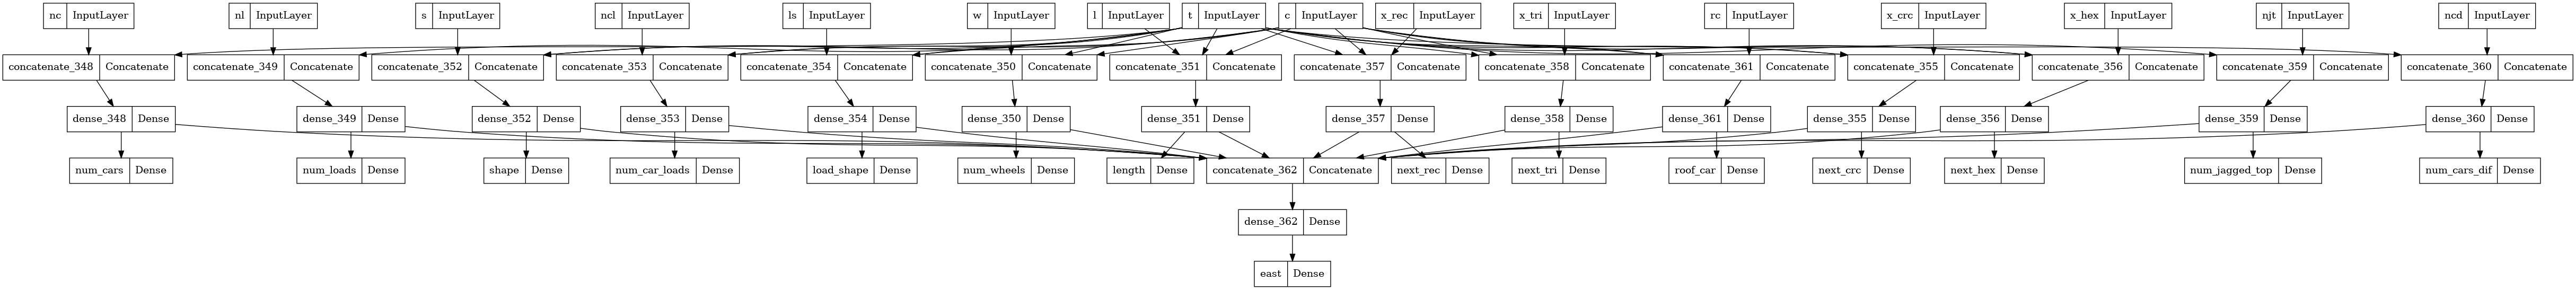

In [ ]:
plot_model(metanet, show_shapes=False, show_layer_names=True)

## Treino do Modelo 2 (com novos trens e novos predicados)

In [ ]:
kf = KFold(n_splits=18, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Cars Accuracy',
  'Output of flat network', 
  'Desired output', 
  'Class'
]

easts = [] # lista para retirar regras posteriormente

q2 = {name: [] for name in q2_names}

for val_train in tqdm(range(0,18)):
    x_train, x_test, y_train, y_test = split2(dt2, val_train)
    metanet, east, rules = metarede2()

    east.compile(
      loss = binary_crossentropy, 
      optimizer =tf.keras.optimizers.Adam(learning_rate=1e-2),
      metrics = ['mse', 'binary_accuracy'])
    hist = east.fit(
      x_train,
      y_train,
      validation_data=[x_test, y_test],
      epochs=1000,
      verbose=0,
      )
    hists[val_train] = hist
    easts.append(east)

    q2['Train'].append(val_train)
    q2['Output of flat network'].append(east.predict(x_test)[0][0])
    q2['Desired output'].append(y_test[0])
    q2['Class'].append(Class_attribute[int(y_test[0])])

  0%|                                                                                            | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 0s 120ms/step


  6%|████▋                                                                               | 1/18 [00:59<16:45, 59.14s/it]

1/1 [==============================] - 0s 108ms/step


 11%|█████████▎                                                                          | 2/18 [01:56<15:29, 58.11s/it]

1/1 [==============================] - 0s 105ms/step


 17%|██████████████                                                                      | 3/18 [02:55<14:35, 58.39s/it]

1/1 [==============================] - 0s 107ms/step


 22%|██████████████████▋                                                                 | 4/18 [03:53<13:35, 58.25s/it]

1/1 [==============================] - 0s 103ms/step


 28%|███████████████████████▎                                                            | 5/18 [04:50<12:33, 57.94s/it]

1/1 [==============================] - 0s 281ms/step


 33%|████████████████████████████                                                        | 6/18 [05:48<11:33, 57.82s/it]

1/1 [==============================] - 0s 104ms/step


 39%|████████████████████████████████▋                                                   | 7/18 [06:47<10:39, 58.14s/it]

1/1 [==============================] - 0s 111ms/step


 44%|█████████████████████████████████████▎                                              | 8/18 [07:44<09:40, 58.01s/it]

1/1 [==============================] - 0s 108ms/step


 50%|██████████████████████████████████████████                                          | 9/18 [08:43<08:44, 58.23s/it]

1/1 [==============================] - 0s 107ms/step


 56%|██████████████████████████████████████████████                                     | 10/18 [09:40<07:44, 58.00s/it]

1/1 [==============================] - 0s 320ms/step


 61%|██████████████████████████████████████████████████▋                                | 11/18 [10:39<06:47, 58.25s/it]

1/1 [==============================] - 0s 105ms/step


 67%|███████████████████████████████████████████████████████▎                           | 12/18 [11:37<05:48, 58.08s/it]

1/1 [==============================] - 0s 104ms/step


 72%|███████████████████████████████████████████████████████████▉                       | 13/18 [12:34<04:49, 57.84s/it]

1/1 [==============================] - 0s 103ms/step


 78%|████████████████████████████████████████████████████████████████▌                  | 14/18 [13:32<03:51, 57.94s/it]

1/1 [==============================] - 0s 105ms/step


 83%|█████████████████████████████████████████████████████████████████████▏             | 15/18 [14:31<02:54, 58.12s/it]

1/1 [==============================] - 0s 106ms/step


 89%|█████████████████████████████████████████████████████████████████████████▊         | 16/18 [15:29<01:56, 58.05s/it]

1/1 [==============================] - 0s 107ms/step


 94%|██████████████████████████████████████████████████████████████████████████████▍    | 17/18 [16:29<00:58, 58.64s/it]

1/1 [==============================] - 0s 109ms/step


100%|███████████████████████████████████████████████████████████████████████████████████| 18/18 [17:27<00:00, 58.20s/it]


### Resultados

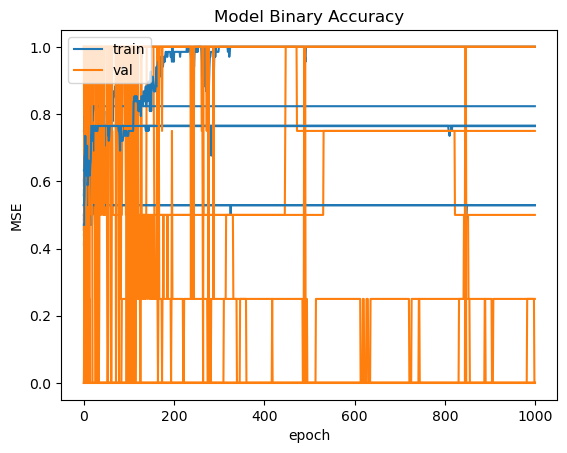

In [ ]:
for i,history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('Model Binary Accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
q2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,18)]

t2 = pd.DataFrame.from_dict(q2).round(2)
t2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,18)]
t2 = t2.reindex(columns=['Train', 'Cars Accuracy', 'Output of flat network', 'Desired output', 'Class'])
t2

,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,0,0.529412,0.49,1.0,east
1,1,0.529412,0.41,1.0,east
2,2,0.764706,1.00,1.0,east
3,3,0.764706,1.00,1.0,east
4,4,0.764706,0.33,1.0,east
5,5,0.764706,0.35,0.0,west
6,6,0.764706,0.35,0.0,west
7,7,0.764706,0.35,0.0,west
8,8,0.529412,0.53,0.0,west
9,9,0.529412,0.53,0.0,west


## Treino do Modelo 2 com os novos trens isolados

In [ ]:
kf = KFold(n_splits=8, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Cars Accuracy',
  'Output of flat network', 
  'Desired output', 
  'Class'
]
q2 = {name: [] for name in q2_names}

for val_train in tqdm(range(10,18)):
    x_train, x_test, y_train, y_test = split2(dt2, val_train)
    metanet, east, rules = metarede2()

    east.compile(
      loss = binary_crossentropy, 
      optimizer =tf.keras.optimizers.Adam(learning_rate=1e-2),
      metrics = ['mse', 'binary_accuracy'])
    hist = east.fit(
      x_train,
      y_train,
      validation_data=[x_test, y_test],
      epochs=1000,
      verbose=0,
      )
    hists[val_train] = hist

    q2['Train'].append(val_train)
    q2['Output of flat network'].append(east.predict(x_test)[0][0])
    q2['Desired output'].append(y_test[0])
    q2['Class'].append(Class_attribute[int(y_test[0])])

  0%|                                                                                             | 0/8 [00:00<?, ?it/s]

1/1 [==============================] - 0s 215ms/step


 12%|██████████▋                                                                          | 1/8 [01:16<08:55, 76.57s/it]

1/1 [==============================] - 0s 233ms/step


 25%|█████████████████████▎                                                               | 2/8 [02:35<07:48, 78.16s/it]

1/1 [==============================] - 0s 173ms/step


 38%|███████████████████████████████▉                                                     | 3/8 [03:57<06:39, 79.83s/it]

1/1 [==============================] - 0s 207ms/step


 50%|██████████████████████████████████████████▌                                          | 4/8 [05:18<05:20, 80.14s/it]

1/1 [==============================] - 0s 248ms/step


 62%|█████████████████████████████████████████████████████▏                               | 5/8 [06:45<04:08, 82.74s/it]

1/1 [==============================] - 0s 223ms/step


 75%|███████████████████████████████████████████████████████████████▊                     | 6/8 [08:07<02:44, 82.31s/it]

1/1 [==============================] - 0s 185ms/step


 88%|██████████████████████████████████████████████████████████████████████████▍          | 7/8 [09:31<01:23, 83.08s/it]

1/1 [==============================] - 0s 197ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████| 8/8 [10:49<00:00, 81.20s/it]


### Resultados 

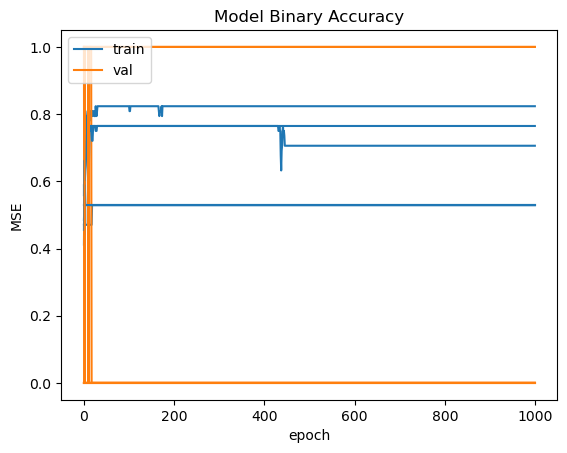

In [ ]:
for i,history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('Model Binary Accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
q2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(10,18)]

t2 = pd.DataFrame.from_dict(q2).round(2)
t2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(10,18)]
t2 = t2.reindex(columns=['Train', 'Cars Accuracy', 'Output of flat network', 'Desired output', 'Class'])
t2

,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,10,0.823529,0.27,1.0,east
1,11,0.529412,0.48,1.0,east
2,12,0.529412,0.48,1.0,east
3,13,0.529412,0.48,1.0,east
4,14,0.529412,0.53,0.0,west
5,15,0.705882,0.40,0.0,west
6,16,0.764706,0.35,0.0,west
7,17,0.529412,0.53,0.0,west


## Treino do Modelo 2 com os dados originais para comparação (com os novos predicados)

In [ ]:
df2_np = df2[0:10]
cols = [[c for c in df2_np.columns if not(str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1])==n)] for n in range(1,5)]

dt2_np = [df2_np[col] for col in cols]
for c, df2_np in enumerate(dt2_np):
    df2_np.columns = [name if not str.isdigit(name[-1]) else name[:-1] for name in df2_np.columns]
    df2_np['car'] = c+1

dt2_np = pd.concat(dt2_np)
dt2_np.reset_index(level=0, inplace=True)
dt2_np['train'] = dt2_np.pop('index')
dt2_np.T[7]

Number_of_cars                 3.0
Number_of_different_loads      2.0
num_jagged_top                 0.0
num_cars_dif                   2.0
num_wheels                    -1.0
length                        -1.0
shape                         -1.0
num_loads                     -1.0
load_shape                    -1.0
roof_car                      -1.0
Rectangle_next_to_rectangle    0.0
Rectangle_next_to_triangle     0.0
Rectangle_next_to_hexagon      0.0
Rectangle_next_to_circle       1.0
Triangle_next_to_triangle      0.0
Triangle_next_to_hexagon       0.0
Triangle_next_to_circle        0.0
Hexagon_next_to_hexagon        0.0
Hexagon_next_to_circle         0.0
Circle_next_to_circle          0.0
Class_attribute                0.0
car                            1.0
train                          7.0
Name: 7, dtype: float64

In [ ]:
dt2_np.head(20)

,Number_of_cars,Number_of_different_loads,num_jagged_top,num_cars_dif,num_wheels,length,shape,num_loads,load_shape,roof_car,...,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,car,train
0,5.0,4.0,0.0,2.0,2.0,0.0,6.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0
1,4.0,3.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,4.0,2.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,2
3,5.0,2.0,0.0,4.0,2.0,0.0,6.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3
4,4.0,3.0,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
5,3.0,2.0,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,5
6,4.0,2.0,1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,6
7,3.0,2.0,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7
8,5.0,2.0,1.0,3.0,2.0,0.0,7.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,8
9,3.0,1.0,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9


In [ ]:
kf = KFold(n_splits=10, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Cars Accuracy',
  'Output of flat network', 
  'Desired output', 
  'Class'
]
q2 = {name: [] for name in q2_names}

for val_train in tqdm(range(0,10)):
    x_train, x_test, y_train, y_test = split2(dt2_np, val_train)
    metanet, east, rules = metarede2()

    east.compile(
      loss = binary_crossentropy, 
      optimizer =tf.keras.optimizers.Adam(learning_rate=1e-2),
      metrics = ['mse', 'binary_accuracy'])
    hist = east.fit(
      x_train,
      y_train,
      validation_data=[x_test, y_test],
      epochs=1000,
      verbose=0,
      )
    hists[val_train] = hist

    q2['Train'].append(val_train)
    q2['Output of flat network'].append(east.predict(x_test)[0][0])
    q2['Desired output'].append(y_test[0])
    q2['Class'].append(Class_attribute[int(y_test[0])])

  0%|                                                                                            | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 103ms/step


 10%|████████▍                                                                           | 1/10 [00:49<07:27, 49.78s/it]

1/1 [==============================] - 0s 106ms/step


 20%|████████████████▊                                                                   | 2/10 [01:40<06:42, 50.36s/it]

1/1 [==============================] - 0s 103ms/step


 30%|█████████████████████████▏                                                          | 3/10 [02:30<05:51, 50.27s/it]

1/1 [==============================] - 0s 101ms/step


 40%|█████████████████████████████████▌                                                  | 4/10 [03:20<04:59, 49.94s/it]

1/1 [==============================] - 0s 103ms/step


 50%|██████████████████████████████████████████                                          | 5/10 [04:09<04:08, 49.69s/it]

1/1 [==============================] - 0s 103ms/step


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [04:58<03:18, 49.52s/it]

1/1 [==============================] - 0s 104ms/step


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [05:50<02:31, 50.46s/it]

1/1 [==============================] - 0s 103ms/step


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [06:41<01:41, 50.59s/it]

1/1 [==============================] - 0s 103ms/step


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [07:31<00:50, 50.24s/it]

1/1 [==============================] - 0s 105ms/step


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [08:21<00:00, 50.11s/it]


### Resultados

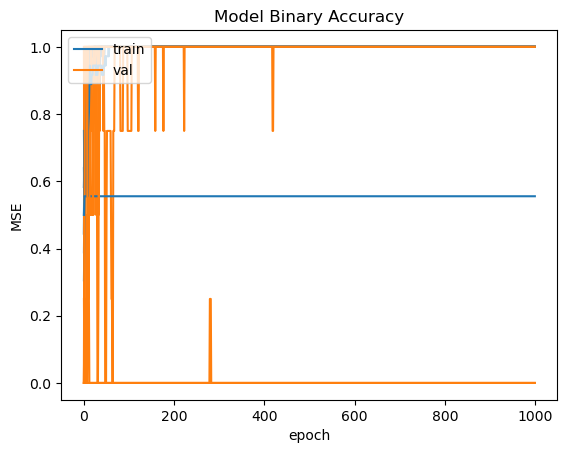

In [ ]:
for i,history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('Model Binary Accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
q2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,10)]

t2 = pd.DataFrame.from_dict(q2).round(2)
t2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,10)]
t2 = t2.reindex(columns=['Train', 'Cars Accuracy', 'Output of flat network', 'Desired output', 'Class'])
t2

,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,0,1.000000,0.99,1.0,east
1,1,1.000000,0.99,1.0,east
2,2,1.000000,1.00,1.0,east
3,3,1.000000,1.00,1.0,east
4,4,1.000000,0.01,1.0,east
5,5,1.000000,0.11,0.0,west
6,6,1.000000,0.01,0.0,west
7,7,0.555556,0.56,0.0,west
8,8,1.000000,0.01,0.0,west
9,9,1.000000,0.01,0.0,west


## Treino do Modelo 1 com novos trens para comparação do desempenho (considerando os predicados originais)  

In [ ]:
kf = KFold(n_splits=18, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Cars Accuracy',
  'Output of flat network', 
  'Desired output', 
  'Class'
]
q2 = {name: [] for name in q2_names}

for val_train in tqdm(range(0,18)):
    x_train, x_test, y_train, y_test = split1(dt_ext, val_train)
    metanet, east, rules = metarede()

    east.compile(
      loss = binary_crossentropy, 
      optimizer =tf.keras.optimizers.Adam(learning_rate=1e-2),
      metrics = ['mse', 'binary_accuracy'])
    hist = east.fit(
      x_train,
      y_train,
      validation_data=[x_test, y_test],
      epochs=1000,
      verbose=0,
      )
    hists[val_train] = hist

    q2['Train'].append(val_train)
    q2['Output of flat network'].append(east.predict(x_test)[0][0])
    q2['Desired output'].append(y_test[0])
    q2['Class'].append(Class_attribute[int(y_test[0])])

  0%|                                                                                            | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 0s 88ms/step


  6%|████▋                                                                               | 1/18 [00:53<15:06, 53.35s/it]

1/1 [==============================] - 0s 87ms/step


 11%|█████████▎                                                                          | 2/18 [01:46<14:12, 53.29s/it]

1/1 [==============================] - 0s 87ms/step


 17%|██████████████                                                                      | 3/18 [02:39<13:15, 53.04s/it]

1/1 [==============================] - 0s 90ms/step


 22%|██████████████████▋                                                                 | 4/18 [03:31<12:19, 52.85s/it]

1/1 [==============================] - 0s 88ms/step


 28%|███████████████████████▎                                                            | 5/18 [04:24<11:27, 52.85s/it]

1/1 [==============================] - 0s 95ms/step


 33%|████████████████████████████                                                        | 6/18 [05:17<10:33, 52.78s/it]

1/1 [==============================] - 0s 88ms/step


 39%|████████████████████████████████▋                                                   | 7/18 [06:10<09:43, 53.02s/it]

1/1 [==============================] - 0s 90ms/step


 44%|█████████████████████████████████████▎                                              | 8/18 [07:03<08:50, 53.03s/it]

1/1 [==============================] - 0s 88ms/step


 50%|██████████████████████████████████████████                                          | 9/18 [07:56<07:56, 52.97s/it]

1/1 [==============================] - 0s 89ms/step


 56%|██████████████████████████████████████████████                                     | 10/18 [08:49<07:03, 52.90s/it]

1/1 [==============================] - 0s 125ms/step


 61%|██████████████████████████████████████████████████▋                                | 11/18 [09:43<06:12, 53.24s/it]

1/1 [==============================] - 0s 101ms/step


 67%|███████████████████████████████████████████████████████▎                           | 12/18 [10:39<05:24, 54.11s/it]

1/1 [==============================] - 0s 96ms/step


 72%|███████████████████████████████████████████████████████████▉                       | 13/18 [11:35<04:32, 54.56s/it]

1/1 [==============================] - 0s 91ms/step


 78%|████████████████████████████████████████████████████████████████▌                  | 14/18 [12:29<03:38, 54.52s/it]

1/1 [==============================] - 0s 97ms/step


 83%|█████████████████████████████████████████████████████████████████████▏             | 15/18 [13:23<02:42, 54.29s/it]

1/1 [==============================] - 0s 88ms/step


 89%|█████████████████████████████████████████████████████████████████████████▊         | 16/18 [14:16<01:47, 53.99s/it]

1/1 [==============================] - 0s 90ms/step


 94%|██████████████████████████████████████████████████████████████████████████████▍    | 17/18 [15:10<00:53, 53.83s/it]

1/1 [==============================] - 0s 89ms/step


100%|███████████████████████████████████████████████████████████████████████████████████| 18/18 [16:03<00:00, 53.53s/it]


### Resultados

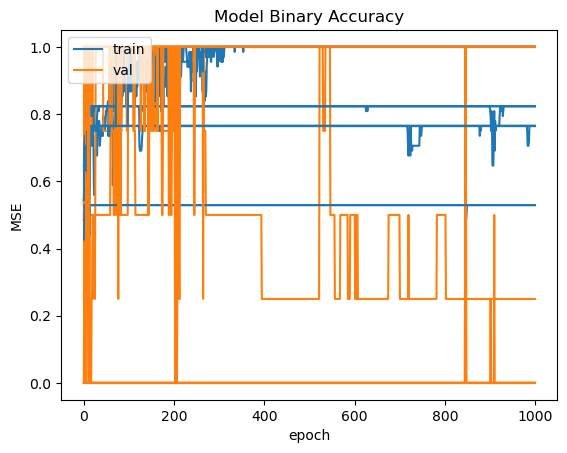

In [ ]:
for i,history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('Model Binary Accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
q2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,18)]

t2 = pd.DataFrame.from_dict(q2).round(2)
t2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,18)]
t2 = t2.reindex(columns=['Train', 'Cars Accuracy', 'Output of flat network', 'Desired output', 'Class'])
t2

,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,0,0.529412,0.48,1.0,east
1,1,1.000000,0.99,1.0,east
2,2,0.764706,1.00,1.0,east
3,3,0.529412,0.48,1.0,east
4,4,1.000000,1.00,1.0,east
5,5,0.764706,0.56,0.0,west
6,6,0.764706,0.35,0.0,west
7,7,0.764706,0.36,0.0,west
8,8,0.764706,0.35,0.0,west
9,9,0.529412,0.53,0.0,west


# Questão 3
credits to https://github.com/abarthakur/trepan_python

In [ ]:
import numpy as np
from scipy import stats
import queue

## Trepan Class

In [ ]:
class Trepan:
    '''
    Wrapper class for tree building algorithm TREPAN as described in 
    "Extracting tree-structured representations of trained networks" : Craven,Shavlik 1993
    Differences/Unimplemented/Implemented differently:
    1. Not using m-of-n splits in decision tree nodes, instead a simple C4.5 split (Quinlan,1993) is used.
    2. Input features must be numeric.
    3. Stopping criterion is only num_nodes < MAX_NODES . Other criterion described in the paper [TODO:Description?] is unimplemented.
    '''

    @staticmethod
    def build_tree(MIN_EXAMPLES_PER_NODE,MAX_NODES,trainX,oracle):
        '''			
            Parameters
            ----------
            MIN_EXAMPLES_PER_NODE : int 
                                    corresponds to S_min in the original paper.
            MAX_NODES 	: int
            trainX		: numpy array 
                        : training examples of dimension (num_examples,num_dimensions) 
            oracle 		: 	Oracle object, used to generate samples given constraints of linear inequalities on the input space,
                            It also wraps the NN model to imitate, which it uses to label the instances. 
            Returns
            --------
            root : the root node of the built tree. Call root.classify(single_example) to get the prediction of the imitating tree. 
                single_example must have dimension (num_examples,num_dimensions)
        '''

        total_num_examples = trainX.shape[0]
        num_dimensions = trainX.shape[1]
        #generate labels from oracle
        labels = np.zeros((trainX.shape[0]))
        print(len(labels))
        for i in range(0,trainX.shape[0]):
            labels[i]=oracle.get_oracle_label(trainX[i,:])

        all_examples=(trainX,labels)
        all_examples_dict={"trainX":trainX,"labels":labels}

        #initialize queue with root
        sortedQueue = queue.PriorityQueue()
        root = Node(all_examples_dict,total_num_examples)
        sortedQueue.put((root.priority,0,root,all_examples,Constraints(num_dimensions)))

        num_nodes=1
        while not sortedQueue.empty():
            (p, tiebreaker, node, examples, constraints)=sortedQueue.get()
            num_examples=examples[0].shape[0]
            assert(node.leaf)
            assert(num_examples>0)

            print("############PROCESSING "+str(num_examples)+" #############")

            if num_examples<MIN_EXAMPLES_PER_NODE:
                print("NEED EXTRA")
                (trainX,labels)= examples
                num_required = MIN_EXAMPLES_PER_NODE - num_examples
                (trainX_oracle,labels_oracle) = oracle.generate_constrained_examples_with_labels(constraints,num_required)
                trainX_aug = np.concatenate([trainX,trainX_oracle],axis=0)
                labels_aug = np.concatenate([labels,labels_oracle],axis=0)
                examples_aug=(trainX_aug,labels_aug)		
            else :
                print("ALL OK")
                examples_aug = examples

            srule = SplitFinder.find_best_m_of_n_split(examples_aug)
            #a good split was not found, so keep as leaf
            if not srule:
                continue
            examples_l,examples_r = partition(examples,srule)

            #even though the trivial splits are avoided with examples_aug, 
            #the splitrule may still split the examples trivially
            #trivial split, so keep as leaf
            if len(examples_l[0])==0 or len(examples_r[0])==0:
                continue

            #TODO: Add stop criterion thresholding the proportion of dominant class, similar to 
            
            #number of nodes will exceed MAX_NODES if we make the split, so keep as leaf
            if (MAX_NODES - num_nodes<2):
                continue

            #split the node, and make as internal
            examples_l_dict={"trainX":examples_l[0],"labels":examples_l[1]}
            examples_r_dict={"trainX":examples_r[0],"labels":examples_r[1]}
            left_child= Node(examples_l_dict,total_num_examples)
            right_child= Node(examples_r_dict,total_num_examples)
            node.left_child = left_child
            node.right_child = right_child
            node.splitrule=srule
            node.leaf=False

            #add child nodes
            constraints_left = constraints.copy()
            constraints_left.addRule(srule)
            priority = left_child.priority
            sortedQueue.put((priority,num_nodes,left_child,examples_l,constraints_left))
            num_nodes+=1
            
            constraints_right = constraints.copy()
            constraints_right .addRule(srule.invert())
            priority = right_child.priority
            sortedQueue.put((priority,num_nodes,right_child,examples_r,constraints_right))
            num_nodes+=1
        
        return root

 ## SplitFinder classes

In [ ]:
class SplitFinder:
    '''
    Wrapper class containing algorithm to find splits, and utility functions to calculate certain mathematical formulae.
    '''


    @staticmethod
    def entropy(class_frequencies,num_examples):
        '''
        Entropy of a data point is the "surprisal" value of it. 
        Less probable points have a higher value of entropy.
        Mathematically, entropy defined for a set of categorical data points is,
        H(x)= - \sum_{i=1}^{n} ( P(X=class_i) \log P(X=class_i) )
        Overall for a set of data points, entropy is more for a more uncertain distribution.
        So, for a homogenous set of points, the entropy is the lowest.
        Entropy is always positive.
        '''
        entropy=0
        for class_i in class_frequencies:
            frequency = class_frequencies[class_i]
            #lim(x->0) xlogx = 0
            if (frequency==0):	
                continue
            prob = float(frequency)/num_examples
            entropy+= (-1) * prob*np.log2(prob)
        return entropy

    @staticmethod
    def mutual_information(X,y):
        '''
        Information gain is the difference in entropy between the original state & the new state.
        In this case it is 
        IG(X)	= H(X) - fraction(X<=split) * H(X|X<=split) - fraction(X>split) * H(X|X>split)
                = H_parent - frac_l * H_l - frac_r * H_r
        Assuming a "less than equal to" split rule.
        Parameters
        ---------
        X : np array of shape (num_examples,)
        y : np array of shape (num_examples,) 
            the category/class labels
        Returns:
        gains : np array of shape (num_examples,1)
                ith value corresponds to taking the ith example as the split point
        '''

        num_examples=X.shape[0]
        assert(y.shape[0]==num_examples)
        assert(len(X.shape)==1 and len(y.shape)==1)

        #get unique classes and their frequencies
        classes, class_frequencies = np.unique(y, return_counts=True)
        num_classes=classes.shape[0]

        #get sorted indices for X, sorting along axis=0 (only axis here)
        sorted_indices=np.argsort(X,axis=0)
        
        #intialize gains array
        gains = np.zeros(num_examples)

        #initialize splits with all points in the left partition
        left_frequencies={}
        right_frequencies={}
        for i in range(0,num_classes):
            left_frequencies[classes[i]]=class_frequencies[i]
            right_frequencies[classes[i]]=0

        entropy_parent = SplitFinder.entropy(left_frequencies,num_examples)
        prev_idx=None
        shifted=0
        '''
        Note: Since this function calculates the IG values iteratively, we need to consider the case of identical values,
        and skip them, since they provide the same split.
        Start with the highest value. (This is the trivial split)
        While calculating the gain, the split point is always in the left set since "<=" rule is use.
        At the end, we shift an example from the left child to the right child (except for case of identical values).
        '''
        for idx in reversed(sorted_indices):
            label = y[idx]

            #case : identical value
            if (prev_idx and X[prev_idx]==X[idx]):
                gains[idx]=gains[prev_idx]
            else:
                frac_right=(float(shifted)/num_examples)
                frac_left=1-frac_right
                gains[idx]=entropy_parent
                gains[idx]-= frac_left* SplitFinder.entropy(left_frequencies,num_examples)
                gains[idx]-= frac_right* SplitFinder.entropy(right_frequencies,num_examples)
            shifted+=1
            right_frequencies[label]+=1
            left_frequencies[label]-=1		
            prev_idx=idx
        return gains

    @staticmethod
    def find_best_single_feature_split(examples):
        '''
        Find the best  split along a single axis, according to maximum information gain.
        This is the same split as used in the C4.5 algorithm, Quinlan 1993
        Returns
        -------
        srule : SplitRule object 
        '''
        (X,labels)=examples
        num_examples=X.shape[0]
        num_dimensions=X.shape[1]
        print("SPLITTING "+str(num_examples)+" EXAMPLES")

        #initialize gains 
        gains = np.zeros((num_examples,num_dimensions))
        #calculate gains considering each feature
        for i in range(0,num_dimensions):
            gains[:,i]= SplitFinder.mutual_information(np.reshape(X[:,i],num_examples),
                                                        np.reshape(labels,num_examples))

        #low gains = parent purity is not increased by much - so don't split
        if (np.max(gains)<1e-6):
            return None

        #get split point (sample_idx,feature_idx), i.e. the point with max gains
        split_point = np.unravel_index(np.argmax(gains),gains.shape)

        #build split rule object
        feature_to_split=split_point[1]
        split_value=X[split_point]

        #avoid making a trivial split
        if (X[:,feature_to_split] <= split_value).all() or (X[:,feature_to_split] >= split_value).all():
            return None

        splits=[(feature_to_split,"lte",split_value)]
        #create a simple split rule, i.e. 1-of-1
        srule= SplitRule(splits,1,1)
        return srule

    @staticmethod
    def find_best_m_of_n_split(examples):
        '''
        Find the best m-of-n split. An m-of-n split, is a splitting function composed of n boolean expressions.
        An m-of-n split is satisifed if at least m-of-n expressions is satisfied
        TODO: Right now just returns a binary split
        '''

        seed= SplitFinder.find_best_single_feature_split(examples)
        ##TODO find best m-of-n split with hill climbing method, with C4.5 split as 
        srule=seed
        return srule


def partition(examples,srule):
	'''
	Utility function to partition an example set by filtering with a SplitRule object.
	Returns
	-------
	examples_l,examples_r : np arrays of shape (*,num_dimensions)
	'''
	(X,y) = examples
	num_examples = X.shape[0]
	left_partition,right_partition=[[],[]]

	for idx in range(0,num_examples):
		if srule.satisfied(X[idx,:]):
			left_partition.append(idx)
		else:
			right_partition.append(idx)

	examples_l = (X[left_partition,:],y[left_partition])
	examples_r = (X[right_partition,:],y[right_partition])
	return examples_l,examples_r


## Oracle Class

In [ ]:
class Oracle:
    '''
    Wrapper object for the ANN which we wish to imitate. Also contains logic to generate examples from the 
    constrained distribution of training examples.
    '''

    def __init__(self,network,num_classes,trainX):
        self.network=network
        self.num_classes=num_classes
        self.dimension=trainX.shape[1]
        self.feature_distributions=self.generate_feature_distributions(trainX)

    def generate_feature_distributions(self,trainX):
        '''
        Returns a list of objects modeling the probability distributions of each feature.
        For continuous features we use Gaussian Kernel Density Estimation from scipy.stats
        '''

        feature_distributions =[]
        #only consider continuous distributions
        for i in range(0,self.dimension):
            feature_values = trainX[:,i].reshape(trainX.shape[0])
            kernel = stats.gaussian_kde(feature_values,bw_method='silverman')
            feature_distributions.append(kernel)
        return feature_distributions

    def get_oracle_label(self,example):
        '''
        Returns the label predicated by the oracle network for example
        '''
        print(f'example type {type(example)}')
        print(f'example shape {example.shape}')
        onehot =self.network.predict(np.array(example)).reshape(self.num_classes)
        # onehot =self.network.predict(np.array([example])).reshape(self.num_classes)
        return np.argmax(onehot)

    def generate_constrained_examples_with_labels(self,constraints,num_examples):
        '''
        Returns a tuple of examples,oracle_labels , where examples are drawn from the distribution of the
        training examples, after constraints have been applied to it.
        '''

        examples= np.zeros((num_examples,self.dimension))
        oracle_labels = np.zeros(num_examples)
        i=0
        print(num_examples)
        for i in range(0,num_examples):
            example=self.generate_constrained_example(constraints)
            label=self.get_oracle_label(example)
            examples[i,:]=example
            oracle_labels[i]=label
                                            
        return (examples,oracle_labels)

    #can be more efficient
    def generate_constrained_example(self,constraints):
        '''
        Returns an example drawn from the distribution of the training examples, after constraints have been applied to it.
        '''

        example = np.zeros(self.dimension)
        #assuming features have independent distributions, sample each feature separately
        for i in range(0,self.dimension):
            min_val = constraints.min_val(i)
            max_val = constraints.max_val(i)
            done=False
            #generate the ith feature by rejection sampling
            while not done :
                #sample i^th feature from its distribution
                example[i]=self.feature_distributions[i].resample(1)[0]
                if example[i] > min_val and example[i] < max_val :
                    done=True
        return example

    def is_valid_example(self,example,constraints):
        '''
        Returns True if sample satisfies given constraints, else False
        '''
        
        for constraint in constraints:
            (satisfied,splitrule)=constraint
            if satisfied!=splitrule.satisfied(example):
                return False
        return True

## Node Class

In [ ]:
class Node:
    '''
    Object represents a single node in the decision tree. It's important fields are
    leaf : bool, True if node is a leaf node, False if it is an internal node
    left_child,right_child : type:Node , children of internal node
    splitrule : type:SplitRule object used to route an arriving example to either the left or right node.
    The splitrule is chosen to be the "best" according to SplitFinder.find_best_m_of_n_split.
    priority is calculated as
    priority = reach (1- fidelity)
    reach 	= fraction of instances that reach n
            = num_examples/total_num_examples
    fidelity= classification rate (wrt to ANN labels, not ground truth)
            = 1 - (misclassified/num_examples)
    '''

    def __init__(self,labeled_examples,total_num_examples):
        self.leaf=True
        self.left_child=None
        self.right_child=None
        self.splitrule=None
        self.num_examples= labeled_examples["trainX"].shape[0]

        if self.num_examples==0:#when does this happen?
            self.priority=0
        else:
            self.dominant = self.get_dominant_class(labeled_examples)
            self.misclassified=self.get_misclassified_count(labeled_examples)
            self.fidelity = 1 - (float(self.misclassified)/self.num_examples)
            self.reach = float(self.num_examples)/total_num_examples
            self.priority = (-1)*self.reach* (1 - self.fidelity)
        
        print("NEW NODE! with priority = "+ str(self.priority))

    def get_dominant_class(self,labeled_examples):
        '''
        This function returns the "dominant" class of this node, i.e., the class with the highest count of the examples in this node.
        The dominant class
        '''

        trainX = labeled_examples["trainX"]
        labels = labeled_examples["labels"]
        class_counts={}
        #get count for all labels
        for label in labels:
            if label not in class_counts:
                #insert in counter
                class_counts[label]=0
            class_counts[label]+=1

        #get the class with the max count
        max_count=0
        max_class=0
        for label in class_counts:
            if class_counts[label]>max_count:
                max_class=label
                max_count=class_counts[label]
        return max_class

    def get_misclassified_count(self,labeled_examples):
        '''
        Get the number of training examples misclassified by this node, if it were a leaf.
        This is nothing but the number of examples not belonging to the dominant class.
        This value is used to calculate the "priority" of a node, which determines when to explore/split a node.
        '''

        labels = labeled_examples["labels"]
        num_misclassified=0
        for label in labels:
            if label != self.dominant:
                num_misclassified+=1
        return num_misclassified

    def classify(self,example):
        '''
        Returns the predicted class for a given example.
        For an internal node, the example is recursively routed to either the left or right child according to the **splitrule**,
        till it descends to a leaf.
        For a leaf, the dominant (max count) class is returned as the label
        '''
        
        if self.leaf :
            return self.dominant
        if self.splitrule.satisfied(example):
            return self.left_child.classify(example)
        else:
            return self.right_child.classify(example)


## Constraints Class

In [ ]:
class Constraints :

	def __init__(self,num_dim):
		# self.cons_list=[]
		self.num_dim=num_dim
		self.max_list = np.zeros(num_dim)
		self.min_list = np.zeros(num_dim)

	def addRule(self,split):
		for i in range(0,self.num_dim):
			self.max_list[i]=max(self.max_list[i],split.max_val(i))
			self.min_list[i]=min(self.min_list[i],split.min_val(i))

	def max_val(self,dim):
		return self.max_list[dim]

	def min_val(self,dim):
		return self.min_list[dim]

	def copy(self):
		c = Constraints(self.num_dim)
		c.max_list=np.copy(self.max_list)
		c.min_list=np.copy(self.min_list)
		return c

## SplitRule Class

In [ ]:
class SplitRule:
	'''
	Class representing a splitting/partitioning function.
	The function is particularly an m-of-n expression which is composed of n boolean value expressions,
	and which is satisfied by an example if at least m out of n expressions is satisfied.
	The boolean expressions are linear inequalities/equalities.
	Keeps a list of upper and lower bounds on each feature. Used by constraints object.
	Parameters
	---------
	splits	: List[(feature_to_split,operator,split_value)]
	m		: int (minimum number of constraints to satisfy for SplitRule to be satisfied)
	n		: int , number of constraints this splitrule is composed of
	'''

	def __init__(self,splits,m,n):
		self.splits=splits
		self.m=m
		self.n=n
		self.op_dict= {"gte":self.gte,"lte":self.lte}
		self.process_splits()

	def process_splits(self):
		self.max_dict={}
		self.min_dict={}
		for (feature_to_split,operator,split_value) in self.splits:
			if operator in ["lte" ,"lt"]:
				if feature_to_split not in self.max_dict:
					self.max_dict[feature_to_split]=split_value
				self.max_dict[feature_to_split] = max(self.max_dict[feature_to_split],split_value)
			elif operator in ["gte","gt"]:
				if feature_to_split not in self.min_dict:
					self.min_dict[feature_to_split]=split_value
				self.min_dict[feature_to_split] = min(self.min_dict[feature_to_split],split_value)

	#for building constraints
	def invert(self):
		'''
		Returns the "inverse" of this SplitRule object. 
		Does this by inverting each of the individual constraints.
		While at each level, only one (left child's) split is evaluated, 
		We need to pass the inverse to the right child to add to its list of constraints.
		Note: What is the inverse of an m-of-n split? 
		'''
		inverted_splits= []
		inverse_map = {"gte":"lt","gt":"lte","lte":"gt","lt":"gte"}
		for (feature_to_split,operator,val) in self.splits:
			inverse_operator=inverse_map[operator]
			inverted_splits.append((feature_to_split,inverse_operator,val))
		invsplit = SplitRule(inverted_splits,self.m,self.n)
		return invsplit

	def gte(self,arg1, arg2):
		return arg1 >= arg2

	def lte(self,arg1, arg2):
		return arg1 <= arg2

	def lt(self,arg1,arg2):
		return arg1 < arg2

	def gt(self,arg1,arg2):
		return arg1 > arg2

	def satisfied(self,sample):
		'''
		Evaluates the splitrule given a sample.
		
		Parameters
		----------
		sample : np array of shape (num_features)
		Returns
		---------
		True if at least m constraints are satisfied
		False otherwise
		'''
		num_satisfied=0
		for split in self.splits:
			(feature_idx,op_string,val)=split
			op = self.op_dict[op_string]
			if op(sample[feature_idx],val):
				num_satisfied+=1
		if num_satisfied < self.m:
			return False
		else:
			return True


	def max_val(self,dim):
		if dim in self.max_dict :
			return self.max_dict[dim]
		else :
			return np.inf

	def min_val(self,dim):
		if dim in self.min_dict:
			return self.min_dict[dim]
		else :
			return -np.inf


## Trepan : Extraction of a decision tree


In [ ]:
## roots for all 
roots = []

for i in range (0, len(easts)):

  oracle = Oracle(east,num_classes,np.array(x_train).T)

    #build decision tree with TREPAN
  MIN_EXAMPLES_PER_NODE = 10
  MAX_NODES=20
  print(f'decision tree for element {val_train}')
  
  root=Trepan.build_tree(MIN_EXAMPLES_PER_NODE,MAX_NODES,np.array(x_train),oracle)
  roots.append(root)

## Extract rules 

### Function definition 

In [ ]:
def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False
        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right :
            return True
        path.remove(node_numb)
        return False


def get_rule(path, column_names):
    mask = ''
    for index, node in enumerate(path):
        #We check if we are not in the leaf
        if index!=len(path)-1:
            # Do we go under or over the threshold ?
            if (children_left[node] == path[index+1]):
                mask += "(df['{}']<= {}) \t ".format(column_names[feature[node]], threshold[node])
            else:
                mask += "(df['{}']> {}) \t ".format(column_names[feature[node]], threshold[node])
    # We insert the & at the right places
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

### Rule Extraction

In [ ]:
for iroot in range(0, len(roots)):
  n_nodes = roots[iroot].tree_.node_count
  children_left = roots[iroot].tree_.children_left
  children_right = roots[iroot].tree_.children_right
  feature = roots[iroot].tree_.feature
  threshold = roots[iroot].tree_.threshold
  # Leaves
  leave_id = roots[iroot].apply(X_test)

  paths ={}
  for leaf in np.unique(leave_id):
      path_leaf = []
      find_path(0, path_leaf, leaf)
      paths[leaf] = np.unique(np.sort(path_leaf))

  rules = {}
  for key in paths:
      rules[key] = get_rule(paths[key], pima.columns)
    # Leaves
  leave_id = roots[iroot].apply(X_test)

  paths ={}
  for leaf in np.unique(leave_id):
      path_leaf = []
      find_path(0, path_leaf, leaf)
      paths[leaf] = np.unique(np.sort(path_leaf))

  rules = {}
  for key in paths:
      rules[key] = get_rule(paths[key], pima.columns)
  print(f'rules for train {iroot}')
  print(rules)